<a href="https://colab.research.google.com/github/Daniel-AlCa/Proyect-2/blob/main/Proyecto_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import legend
import seaborn as sns
import numpy as np
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_selector
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import StratifiedKFold

In [10]:
#Dataset

#1) Fuente de datos: Kaggle

filename1 =('/content/drive/MyDrive/Coding Dojo/Codificación de Coding Dojo/Proyecto 2/winequality-white-and-red.xlsx')
df1=pd.read_excel(filename1)
df1.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,colour,quality
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1,6
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1,6
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1,6
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,6
4,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,6
5,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1,6
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,1,6
7,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1,6
8,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1,6
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,1,6


In [11]:
# 2) Breve descripción de datos
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  colour                6497 non-null   int64  
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [12]:
# 3) ¿Cuál es el objetivo?

#El objetivo seriaclasificar la calidad el vino la cual tiene numeros de 3-9, para lo cual se segmentaran en 3 rangos de calidades Low (3-4), Medium (5-7), High (8-9)
#Low tendra asignado el número: 0, Medium : 1, High: 2
cquality=[]
for x in range (len(df1)):
  if df1['quality'][x]<=4:
    cquality.append(0)
  elif df1['quality'][x]>=5 and df1['quality'][x]<=7 :
    cquality.append(1)
  elif df1['quality'][x]>=8 :
    cquality.append(2)

df1['Class']=cquality
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,colour,quality,Class
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,1,6,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,1,6,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,1,6,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1,6,1
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0,5,1
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0,6,1
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0,6,1
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0,5,1


In [13]:
#4) ¿Este es un problema de clasificación o regresión?

#Una vez transformada la columna seria un problema de clasificación de 3 variables

#5) ¿Cuántas características hay?

#hay 12 caracteristicas

#6) ¿Cuántas filas de datos hay?

#6497 filas

#7) ¿Qué retos, si es que hay alguno, prevén en la limpieza, exploración o modelización con este conjunto de datos?

#el reto fue unir dos datasets Los de color blanco (en la columna Colour se representan con el nro 1) y el dataset de vino rojo (en la columna Colour se representan con el nro 0) , 
#Se tuvo que verificar que las columnas tengan el mismo orden y datos analogos, agregar la columna de color y como vimos en el paso anteriro 
#clasificar los datos en rangos de calidad como se ve en el #)3 

#¿Deberia eliminarse la columna que contiene los valores numericos de calidad con valores del 3 al 9?
#Si, ya que tendria mucha relacion directa y es basicamente la columna que queremos predecir

In [14]:
#Semana 2
  #Se trabajara con los datos de la calidad del vino:

# -eliminado las columnas innecesarias
    #eliminar columna original de calidad del vino
df1 = df1.drop(columns=['quality'])
# -eliminado las filas duplicadas

df1.duplicated().sum() # hay filas duplicadas
df1=df1.drop_duplicates()
df1.duplicated().sum() #hay 0 filas duplicadas
df1.reset_index(inplace=True, drop=False)

#-identificado y abordado los valores faltantes

    #No hay datos Nan
  
#-identificado y corregido las inconsistencias en los datos para los valores categóricos (es decir, Cat, cat, cats)

    #Todos los datos son numeros enteros o con decimales


(5320, 14)

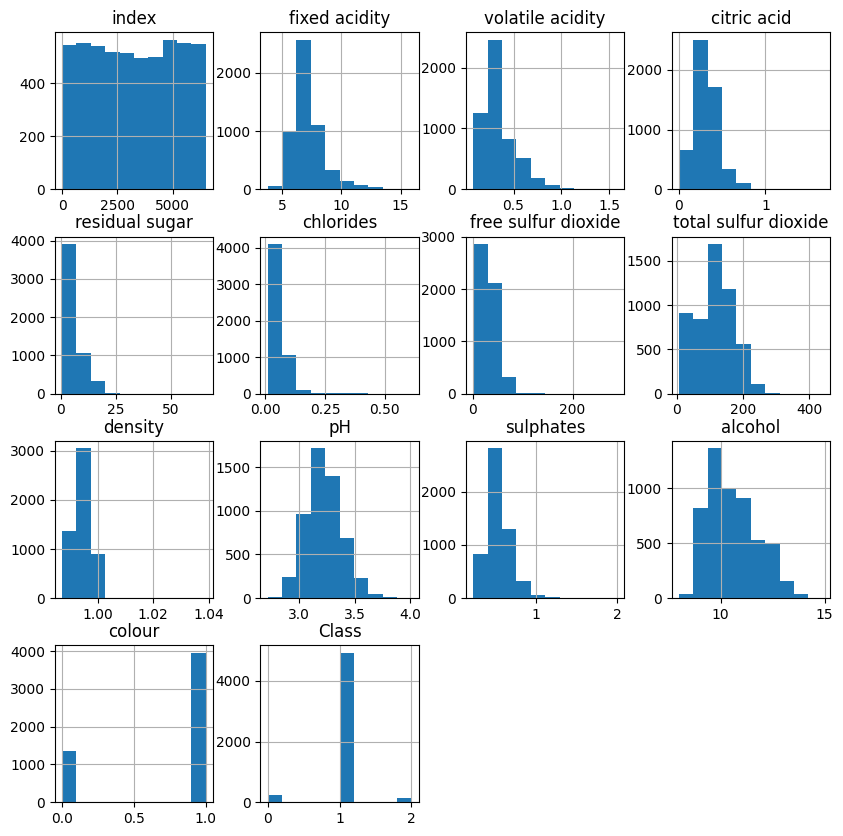

In [15]:
#-producido visuales univariantes para el objetivo y todas las características

df1.hist(figsize=(10,10));
df1.shape

In [16]:
#-identificado los valores atípicos
df1.info()
#pd.set_option("display.max_rows",None)
#pd.reset_option("all")
df1['Class'].value_counts()
#se revisaron los valores de cada colimna y no se dientificaron valores atípicos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5320 entries, 0 to 5319
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5320 non-null   int64  
 1   fixed acidity         5320 non-null   float64
 2   volatile acidity      5320 non-null   float64
 3   citric acid           5320 non-null   float64
 4   residual sugar        5320 non-null   float64
 5   chlorides             5320 non-null   float64
 6   free sulfur dioxide   5320 non-null   float64
 7   total sulfur dioxide  5320 non-null   float64
 8   density               5320 non-null   float64
 9   pH                    5320 non-null   float64
 10  sulphates             5320 non-null   float64
 11  alcohol               5320 non-null   float64
 12  colour                5320 non-null   int64  
 13  Class                 5320 non-null   int64  
dtypes: float64(11), int64(3)
memory usage: 582.0 KB


1    4931
0     236
2     153
Name: Class, dtype: int64

Se aprecia que la columna con mayor relación a la calidad es el alcohol


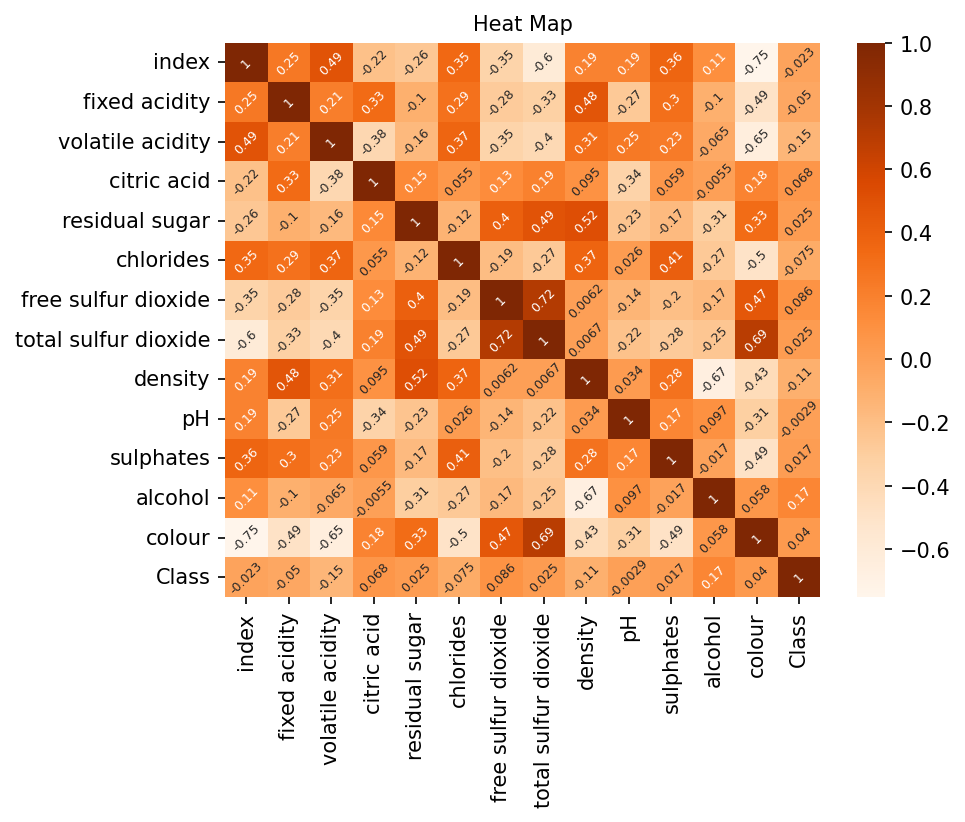

In [17]:
# producido un mapa de calor de correlación e identificado cualquier correlaciones moderadas o
# fuertes entre el objetivo y las características y/o entre una característica y otra

corr = df1.corr(numeric_only=True)
corr

plt.figure(dpi = 150)
sns.heatmap(corr, cmap = 'Oranges', annot = True, annot_kws={"size": 6,"rotation":45});

plt.title("Heat Map",fontsize = 10);

print('Se aprecia que la columna con mayor relación a la calidad es el alcohol')

In [18]:
#Creación de dataframes de test y train
'''Debido a que el dataset a trabjar tiene una columna de objetivo muy desbalanceada, se usara Smote para agrandar el numero de filas  de manera que estas tengan la 
misma proporción de la salida'''

X=df1.drop("Class",axis=1)
y=df1["Class"]
smote=SMOTE()
X_res,y_res=smote.fit_resample(X,y)


In [19]:
len(y_res)

14793

In [20]:
df1_res=pd.concat([pd.DataFrame(X_res),pd.DataFrame(y_res,columns=["Class"])],axis=1)
df1_res["Class"].value_counts()

1    4931
2    4931
0    4931
Name: Class, dtype: int64

In [21]:
X=X_res
y=y_res


In [22]:
#Test Train Split


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [ ]:
#Descision tree Classifier

dec_tree = DecisionTreeClassifier(random_state = 42)

dec_tree.fit(X_train, y_train)

PredDT=dec_tree.predict(X_test)


train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)
print(train_score)
print(test_score)

dec_tree.get_depth()

1.0
0.8853744255204109


29

Mayor Accuracy en Depth:  26 , Valor:  0.8853744255204109


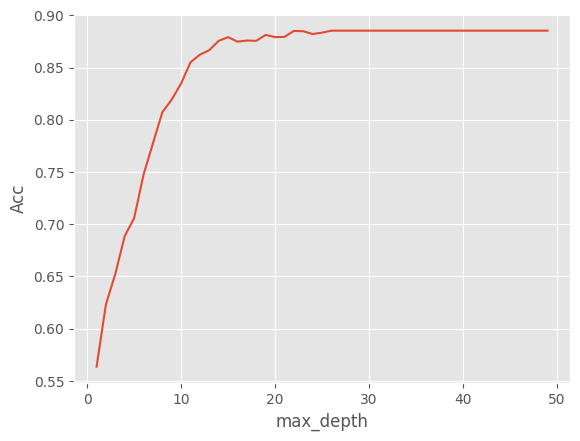

In [ ]:

max_depth_range = list(range(1, 50))
# Lista para almacenar la puntuación para cada valor de max_depth:
Acc = []

for depth in max_depth_range:
    dec_tree = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 42)
    dec_tree.fit(X_train, y_train)
    pred=dec_tree.predict(X_test)

    score = dec_tree.score(X_test, y_test)
   
    Acc.append(score)


plt.style.use('ggplot');
plt.plot(max_depth_range,Acc,label="Accuracy")
plt.xlabel('max_depth')
plt.ylabel('Acc');


max_acc=0
max_acc_index=0
for i in range(len(Acc)):
  if Acc[i]>max_acc:
    max_acc= Acc[i]
    max_acc_index=i

print('Mayor Accuracy en Depth: ',max_acc_index+1, ', Valor: ',max_acc) 

In [ ]:
#Decision tree Óptimo:
dec_tree = DecisionTreeClassifier(max_depth=20,random_state = 42)

dec_tree.fit(X_train, y_train)

PredDT=dec_tree.predict(X_test)


DTtrain_score = dec_tree.score(X_train, y_train)
DTtest_score = dec_tree.score(X_test, y_test)
print('Decision Tree Results:')
print('')
print(' Train Accuracy:',round(DTtrain_score*100,2),'%')
print(' Test Accuracy', round(DTtest_score*100,2),'%')
print('')

#Calsification Report
print(' Classification report:')
DTCR=classification_report(y_test,PredDT)
print(DTCR)


Decision Tree Results:

 Train Accuracy: 99.33 %
 Test Accuracy 87.92 %

 Classification report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1232
           1       0.87      0.77      0.82      1246
           2       0.90      0.94      0.92      1221

    accuracy                           0.88      3699
   macro avg       0.88      0.88      0.88      3699
weighted avg       0.88      0.88      0.88      3699



In [ ]:
#Bagging Tree Clasifier

bag_tree = BaggingClassifier(estimator=(DecisionTreeClassifier(random_state = 42,max_depth=20)),random_state = 42)

bag_tree.fit(X_train, y_train)

PredBT=bag_tree.predict(X_test)

Btrain_score = bag_tree.score(X_train, y_train)
Btest_score = bag_tree.score(X_test, y_test)
print(' Train Accuracy:',round(Btrain_score*100,2),'%')
print(' Test Accuracy:', round(Btest_score*100,2),'%')



 Train Accuracy: 99.03 %
 Test Accuracy: 92.21 %


Mayor Accuracy en Estimador:  62 , Valor:  0.9402541227358746


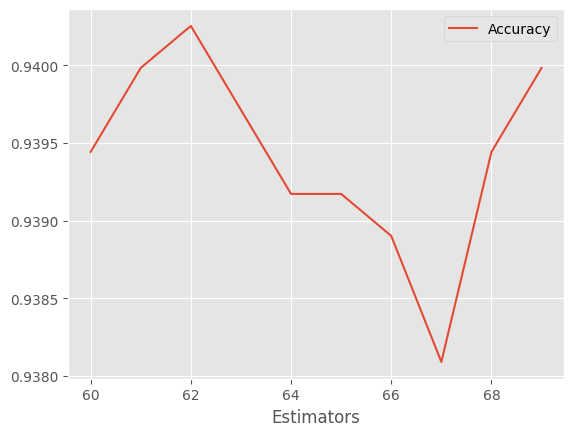

In [ ]:
# Valor optimo de estimador

estimator_range = list(range(60, 70))
# Lista para almacenar la puntuación para cada valor de instanciador:
Acc = []

for estimator in estimator_range:
    bag_tree = BaggingClassifier(n_estimators = estimator, 
                             random_state = 42)
    bag_tree.fit(X_train, y_train)
    pred=bag_tree.predict(X_test)

    score = bag_tree.score(X_test, y_test)
    Acc.append(score)



plt.plot(estimator_range,Acc,label="Accuracy")
plt.xlabel('Estimators')

plt.legend(fontsize=10);
max_acc=0
max_acc_index=0
for i in range(len(Acc)):
  if Acc[i]>max_acc:
    max_acc= Acc[i]
    max_acc_index=i

print('Mayor Accuracy en Estimador: ',max_acc_index+60, ', Valor: ',max_acc) 

In [ ]:
#Bagging Tree Clasifier Optimo
bag_tree = BaggingClassifier(n_estimators=64,random_state = 42)

bag_tree.fit(X_train, y_train)

PredBT=bag_tree.predict(X_test)

Btrain_score = bag_tree.score(X_train, y_train)
Btest_score = bag_tree.score(X_test, y_test)
print('Bagging Tree Results:')
print('')
print(' Train Accuracy:',round(Btrain_score*100,2),'%')
print(' Test Accuracy:', round(Btest_score*100,2),'%')
print('')
#Calsification Report
print(' Classification report:')
BTCR=classification_report(y_test,PredBT)
print(BTCR)

Bagging Tree Results:

 Train Accuracy: 100.0 %
 Test Accuracy: 93.92 %

 Classification report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1232
           1       0.94      0.88      0.91      1246
           2       0.95      0.97      0.96      1221

    accuracy                           0.94      3699
   macro avg       0.94      0.94      0.94      3699
weighted avg       0.94      0.94      0.94      3699



In [ ]:
#Random forest tree classifier

rf_tree = RandomForestClassifier(n_estimators=64,random_state = 42)

rf_tree.fit(X_train, y_train)

PredRF=rf_tree.predict(X_test)

rftrain_score = rf_tree.score(X_train, y_train)
rftest_score = rf_tree.score(X_test, y_test)
print('Train Accuracy:',round(rftrain_score*100,2),'%')
print('Test Accuracy', round(rftest_score*100,2),'%')



Train Accuracy: 100.0 %
Test Accuracy 95.62 %


Mayor Accuracy en Estimador:  95 , Valor:  0.9589078129224115


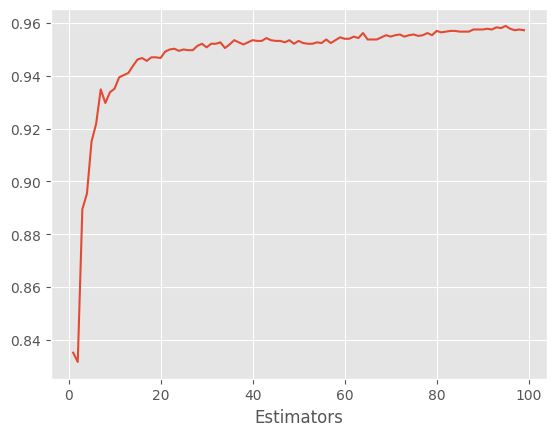

In [ ]:
# Valor optimo de estimador

estimator_range = list(range(1,100))
# Lista para almacenar la puntuación para cada valor de instanciador:
Acc = []

for estimator in estimator_range:
    rf_tree = RandomForestClassifier(n_estimators = estimator, 
                             random_state = 42)
    rf_tree.fit(X_train, y_train)
    pred=rf_tree.predict(X_test)

    score = rf_tree.score(X_test, y_test)

    Acc.append(score)



plt.plot(estimator_range,Acc,label="Accuracy")
plt.xlabel('Estimators')

max_acc=0
max_acc_index=0
for i in range(len(Acc)):
  if Acc[i]>max_acc:
    max_acc= Acc[i]
    max_acc_index=i

print('Mayor Accuracy en Estimador: ',max_acc_index+1, ', Valor: ',max_acc) 

In [ ]:
#Random forest tree classifier Optimo

rf_tree = RandomForestClassifier(n_estimators=95,random_state = 42)

rf_tree.fit(X_train, y_train)

PredRF=rf_tree.predict(X_test)

rftrain_score = rf_tree.score(X_train, y_train)
rftest_score = rf_tree.score(X_test, y_test)
print('Bagging Tree Results:')
print('')
print('Train Accuracy:',round(rftrain_score*100,2),'%')
print('Test Accuracy', round(rftest_score*100,2),'%')
#Calsification Report
print(' Classification report:')
RFCR=classification_report(y_test,PredRF)
print(RFCR)

Bagging Tree Results:

Train Accuracy: 100.0 %
Test Accuracy 95.89 %
 Classification report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1232
           1       0.97      0.90      0.94      1246
           2       0.96      0.99      0.97      1221

    accuracy                           0.96      3699
   macro avg       0.96      0.96      0.96      3699
weighted avg       0.96      0.96      0.96      3699



In [ ]:
#K Nearest Neighbours


#Escalando los datos 
scaler = StandardScaler() 

#KNN
knn = KNeighborsClassifier()
knn_pipe = make_pipeline(scaler, knn)

knn_pipe.fit(X_train, y_train)

Knn_train_acc_score = knn_pipe.score(X_train, y_train)
Knn_test_acc_score = knn_pipe.score(X_test, y_test)
print('Train Accuracy:',round(Knn_train_acc_score*100,2),'%')
print('Test Accuracy:',round(Knn_test_acc_score*100,2),'%')


Train Accuracy: 91.22 %
Test Accuracy: 88.65 %


Mayor Accuracy en K:  1 , Valor:  0.9316031359826981


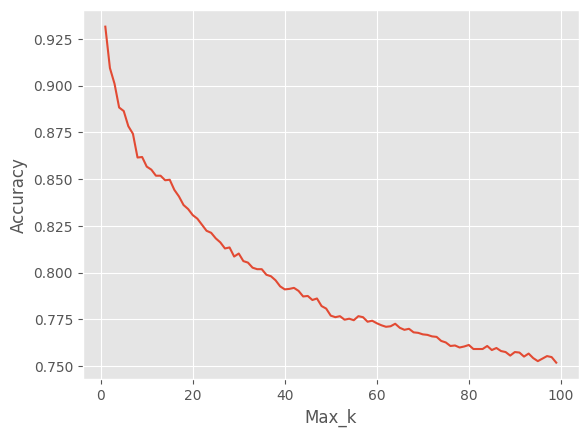

In [ ]:
#Hallar valor optimo de K

max_k_range = list(range(1, 100))
# Lista para almacenar la puntuación para cada valor de max_k:
Acc = []
for k in max_k_range:
    knn = KNeighborsClassifier(n_neighbors= k)
    knn_pipe = make_pipeline(scaler, knn)
    knn_pipe.fit(X_train, y_train)
    score = knn_pipe.score(X_test, y_test)
    Acc.append(score)


plt.plot(max_k_range, Acc)
plt.xlabel('Max_k')
plt.ylabel('Accuracy');
plt.style.use('ggplot');

max_acc=0
max_acc_index=0
for i in range(len(Acc)):
  if Acc[i]>max_acc:
    max_acc= Acc[i]
    max_acc_index=i

print('Mayor Accuracy en K: ',max_acc_index+1, ', Valor: ',max_acc) 

In [ ]:
#KNN Optimo
knn = KNeighborsClassifier(n_neighbors=1)
knn_pipe = make_pipeline(scaler, knn)

knn_pipe.fit(X_train, y_train)

Knn_train_acc_score = knn_pipe.score(X_train, y_train)
Knn_test_acc_score = knn_pipe.score(X_test, y_test)
print('Train Accuracy:',round(Knn_train_acc_score*100,2),'%')
print('Test Accuracy:',round(Knn_test_acc_score*100,2),'%')

Train Accuracy: 100.0 %
Test Accuracy: 93.16 %


In [ ]:
#Regresión Logística

X_train, X_test, y_train, y_test =train_test_split(X,
                                                   y,
                                                   test_size=0.3, 
                                                   random_state=0, 
                                                   stratify=y)

In [ ]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

# Standardize Data
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

log_reg = LogisticRegression(penalty='l1',
                        C=1.0,
                        solver='liblinear',
                        multi_class='ovr')
log_reg.fit(X_train, y_train)
print('Training accuracy:', log_reg.score(X_train, y_train))
print('Test accuracy:', log_reg.score(X_test, y_test))

Training accuracy: 0.7098985997102849
Test accuracy: 0.7136097341144659


{0.0001: 0.3334835511491663,
 0.001: 0.5986931050022533,
 0.01: 0.7007661108607481,
 0.1: 0.7136097341144659,
 1: 0.7136097341144659,
 10: 0.7140603875619649,
 100: 0.7136097341144659,
 1000: 0.7136097341144659}

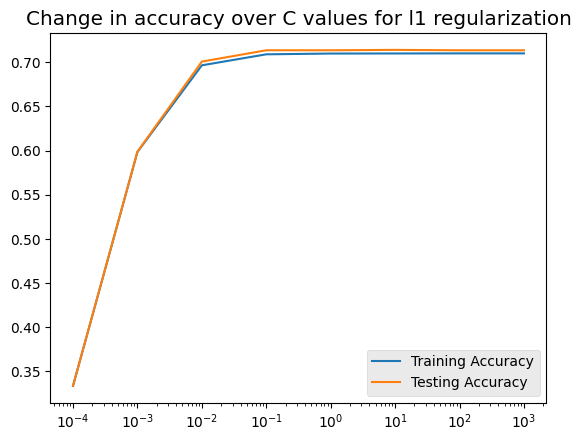

In [ ]:
#Afinar con L1

# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
  # instantiate a model with each value of c and fit it on the data
for c in c_values:
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l1')
  log_reg_pipe = make_pipeline(scaler, log_reg)
  log_reg_pipe.fit(X_train, y_train)
 
  # add the training and testing scores to our scores lists
  train_scores.append(log_reg_pipe.score(X_train, y_train))
  test_scores.append(log_reg_pipe.score(X_test, y_test))
 
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
plt.style.use('ggplot');
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l1 regularization')
ax.legend()
 
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}

{0.0001: 0.6390265885534024,
 0.001: 0.6854438936457864,
 0.01: 0.7088778729157278,
 0.1: 0.7147363677332131,
 1: 0.7136097341144659,
 10: 0.7138350608382155,
 100: 0.7136097341144659,
 1000: 0.7136097341144659}

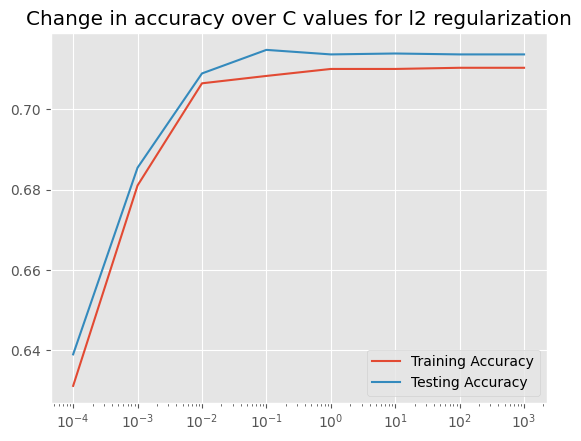

In [ ]:
#Afinar con L2
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
#iterative over the c values
for c in c_values:
  # instantiate a model with each value of c and fit it on the data
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l2')
  log_reg_pipe = make_pipeline(scaler, log_reg)
  log_reg_pipe.fit(X_train, y_train)
 
  # add the training and testing scores to our scores lists
  train_scores.append(log_reg_pipe.score(X_train, y_train))
  test_scores.append(log_reg_pipe.score(X_test, y_test))
  
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l2 regularization')
ax.legend()
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}

In [ ]:
#Regresion logistica Optima
log_reg = LogisticRegression(penalty='l2',
                        C=0.1,
                        solver='liblinear',
                        multi_class='ovr')
log_reg.fit(X_train, y_train)
print('Training accuracy:', log_reg.score(X_train, y_train))
print('Test accuracy:', log_reg.score(X_test, y_test))

Training accuracy: 0.708256880733945
Test accuracy: 0.7147363677332131


In [23]:
#Modelos de boosting

#1-Gradient boosting


# instancien el escalador
scaler = StandardScaler()

#Seleccionando columnas numéricas
A = make_column_selector(dtype_include='number')
NumCar = X[A(X)]
NumCar

# ajusten el escalador en los datos
scaler.fit(NumCar)

# transformen los datos
scaled = scaler.transform(NumCar)


# transformen de nuevo a un DataFrame
X_scaled = pd.DataFrame(scaled, columns=NumCar.columns)
X_scaled.head()
X_scaled = pd.DataFrame(scaled, columns=NumCar.columns)
X_scaled
X_scaled.describe().round(2)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42)

# Instantiate and fit gradient boosting classifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

print('Training accuracy:', gbc.score(X_train, y_train))
print('Testing accuracy:', gbc.score(X_test, y_test))

Training accuracy: 0.8802055164954029
Testing accuracy: 0.8572587185725872


In [24]:


# Instantiate and fit gradient boosting classifier
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)


print('Training accuracy:', lgbm.score(X_train, y_train))
print('Testing accuracy:', lgbm.score(X_test, y_test))



Training accuracy: 0.9964845862628448
Testing accuracy: 0.9745877264125439


In [25]:

# Instantiate and fit gradient boosting classifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
print('Training accuracy:', xgb.score(X_train, y_train))
print('Testing accuracy:', xgb.score(X_test, y_test))

#MEJOR VALOR HASTA AHORA

Training accuracy: 0.9998197223724535
Testing accuracy: 0.9781021897810219


Mayor Accuracy en Estimador:  96 , Valor:  0.9781021897810219


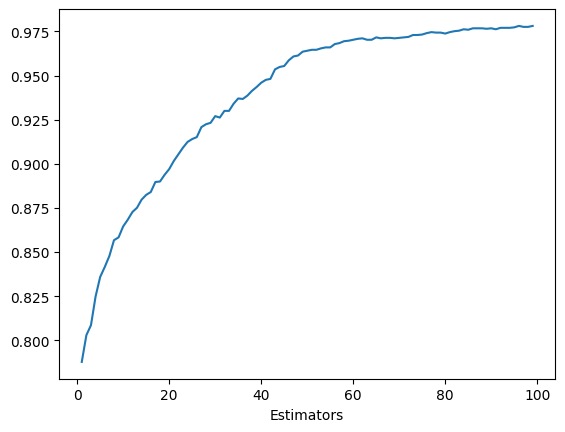

In [30]:
# Valor optimo de estimador

estimator_range = list(range(1,100))
# Lista para almacenar la puntuación para cada valor de instanciador:
Acc = []

for estimator in estimator_range:
    XGB = XGBClassifier(n_estimators = estimator, 
                             random_state = 42)
    XGB.fit(X_train, y_train)
    pred=XGB.predict(X_test)

    score = XGB.score(X_test, y_test)

    Acc.append(score)



plt.plot(estimator_range,Acc,label="Accuracy")
plt.xlabel('Estimators')

max_acc=0
max_acc_index=0
for i in range(len(Acc)):
  if Acc[i]>max_acc:
    max_acc= Acc[i]
    max_acc_index=i

print('Mayor Accuracy en Estimador: ',max_acc_index+1, ', Valor: ',max_acc) 

Epoch 1/40
347/347 [==============================] - 7s 5ms/step - loss: 0.9498 - accuracy: 0.5296 - val_loss: 0.7660 - val_accuracy: 0.6783
Epoch 2/40
347/347 [==============================] - 1s 4ms/step - loss: 0.6845 - accuracy: 0.7063 - val_loss: 0.6544 - val_accuracy: 0.7170
Epoch 3/40
347/347 [==============================] - 2s 6ms/step - loss: 0.6264 - accuracy: 0.7308 - val_loss: 0.6244 - val_accuracy: 0.7267
Epoch 4/40
347/347 [==============================] - 2s 6ms/step - loss: 0.5985 - accuracy: 0.7423 - val_loss: 0.6048 - val_accuracy: 0.7370
Epoch 5/40
347/347 [==============================] - 2s 4ms/step - loss: 0.5809 - accuracy: 0.7530 - val_loss: 0.5878 - val_accuracy: 0.7470
Epoch 6/40
347/347 [==============================] - 1s 4ms/step - loss: 0.5656 - accuracy: 0.7601 - val_loss: 0.5784 - val_accuracy: 0.7518
Epoch 7/40
347/347 [==============================] - 1s 4ms/step - loss: 0.5535 - accuracy: 0.7653 - val_loss: 0.5743 - val_accuracy: 0.7591
Epoch 

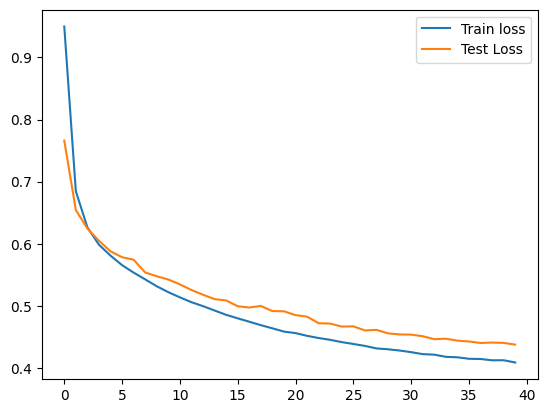

In [26]:
#Redes neuronales



input_shape = X_train.shape[1]
input_shape

# Sequential model
model = Sequential()

# First hidden layer
model.add(Dense(13, 
                input_dim = input_shape, 
                activation = 'relu')) 

# Second hidden layer
model.add(Dense(10, 
                activation = 'relu')) 

# Third hidden layer
model.add(Dense(7, 
                activation = 'relu')) 
# Forth hidden layer
model.add(Dense(5, 
                activation = 'relu')) 

# Output layer
model.add(Dense(3, activation = 'softmax'))

# Step 2: Compile
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam',metrics=["accuracy"])

# Step 3: Fit our model
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=40)

# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

In [27]:
loss, acc = model.evaluate(X_test, y_test,
                            batch_size=32)
print("Loss:", loss) # Función de pérdida
print("Accuracy:", acc)

116/116 [==============================] - 0s 2ms/step - loss: 0.4376 - accuracy: 0.8308
Loss: 0.43762317299842834
Accuracy: 0.8307650685310364


In [ ]:
#Modelo de Producción:
# Instantiate and fit gradient boosting classifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
print('Training accuracy:', xgb.score(X_train, y_train))
print('Testing accuracy:', xgb.score(X_test, y_test))



Training accuracy: 0.9997295835586804
Testing accuracy: 0.9775615031089484
